<a href="https://colab.research.google.com/github/vifirsanova/hse-python-course/blob/main/pandas_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Туториал В. И. Фирсановой специально для курса "Основы программирования на Python" НИУ ВШЭ в Санкт-Петербурге`

[Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

# Начало работы

Импорт модуля `import pandas as pd`

---

Почему `pd`?

По договоренности!

Это не влияет на работу модуля, но принято загружать библиотеку именно так, но именно с таким сокращением `pd` вы встретитесь в любой части официальной документации Pandas.

In [ ]:
import pandas as pd

# Структуры данных Pandas

## DataFrame

Что такое `DataFrame`?

`DataFrame` - это двухмерная структура для хранения данных

Почему двухмерная? - У нее 2 измерения: строки и столбцы (таблица!)

Какие типы данных можно в нее записать? Str, Int, Float, etc...

In [ ]:
# создать DataFrame вручную можно с помощью pd.DataFrame()
# в скобки поместите словарь:
# ключи словаря - названия столбцов
# значения словаря - списки, которые вы хотите записать в соответсвующие столбцы

# в этом примере мы создаем DataFrame с тремя столбцами - Name, Age, Sex
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)

# отобразим результат
df

Name  Age     Sex
0   Braund, Mr. Owen Harris   22    male
1  Allen, Mr. William Henry   35    male
2  Bonnell, Miss. Elizabeth   58  female

Задание: создать DataFrame следующего вида

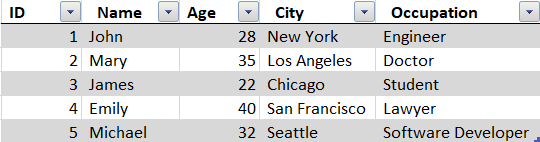

In [ ]:
### ваш код здесь ###

In [ ]:
"""
Образец результата
"""

Name  Age           City          Occupation
0     John   28       New York            Engineer
1     Mary   35    Los Angeles              Doctor
2    James   22        Chicago             Student
3    Emily   40  San Francisco              Lawyer
4  Michael   32        Seattle  Software Developer

## Series

`Series` - это столбец объекта `DataFrame`

In [ ]:
# получить доступ к Series (столбцу) можно, поместив название столбца в квадратные скобки,
# как будто это питоновский словарь, а мы хотим получить информацию по ключу
df['Age']

0    22
1    35
2    58
Name: Age, dtype: int64

Задание: выведите на экран `Series` по ключу `Occupation`

In [ ]:
### ваш код здесь ###

In [ ]:
"""
Образец результата
"""

0              Engineer
1                Doctor
2               Student
3                Lawyer
4    Software Developer
Name: Occupation, dtype: object

У объекта `Series` нет подписей столбцов, но строки имеют свои идентификаторы.

Создадим объект `Series` с помощью `pd.Series`. В скобках нужно указать данные, которые мы хотим записать и имя нашего объекта.

In [ ]:
ages = pd.Series([22, 35, 58], name="Age")
ages

0    22
1    35
2    58
Name: Age, dtype: int64

Задание: создать `Series` под названием `Surnames` со следующей информацией:

```
1. Smith
2. Johnson
3. Davis
4. Taylor
5. Brown
```

In [ ]:
### ваш код здесь ###

In [ ]:
"""
Образец результата
"""

0      Smith
1    Johnson
2      Davis
3     Taylor
4      Brown
Name: Surnames, dtype: object

Конкатенируем наши объекты

In [ ]:
df = pd.concat([df, surnames], axis=1)
df

Name  Age           City          Occupation Surnames
0     John   28       New York            Engineer    Smith
1     Mary   35    Los Angeles              Doctor  Johnson
2    James   22        Chicago             Student    Davis
3    Emily   40  San Francisco              Lawyer   Taylor
4  Michael   32        Seattle  Software Developer    Brown

Что дальше?

К нашим объектам можно применять любые функции. Для этого после точки пропишите метод и передайте аргументы (если они требуются). Как в задачах по теме ООП!

In [ ]:
# например, функция describe описывает все числовые данные в вашем DataFrame
df.describe()

Age
count   5.000000
mean   31.400000
std     6.841053
min    22.000000
25%    28.000000
50%    32.000000
75%    35.000000
max    40.000000

# Чтение данных

Обычно мы храним данные в формате `csv` (comma-separated values)

Для чтения таких файлов есть функция `read_csv`

In [ ]:
# загрузим датасет про Титаник
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [ ]:
# прочитаем его и проверим, что всё считалось
titanic = pd.read_csv("titanic.csv")

In [ ]:
# выведем на экран первые 3 строки
titanic.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [ ]:
# выведем на экран последние 5 строк
titanic.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [ ]:
# посмотрим, какие типы данных хранятся в столбцах датасета
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# мы говорили о том, что DataFrame - двухмерный объект
# shape позволяет узнать количество строк и столбцов
titanic.shape

(891, 12)

Задание: скачайте и загрузите (через Files либо с помощью wget) датасет в формате csv по теме вашего проекта. Прочитайте его и с помощью `describe`, `head`, `tail`, `info` и `shape` выведите на экран информацию о ваших данных.

In [ ]:
### ваш код здесь ###

# Чистка данных

In [ ]:
# одна пара квадратных скобок позволяет нам выделить 1 столбец
# две пары квадратных скобок позволяют нам отфильтровать только указанные столбцы
titanic[["Name", "Age", "Sex"]]

Name   Age     Sex
0                              Braund, Mr. Owen Harris  22.0    male
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0  female
2                               Heikkinen, Miss. Laina  26.0  female
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0  female
4                             Allen, Mr. William Henry  35.0    male
..                                                 ...   ...     ...
886                              Montvila, Rev. Juozas  27.0    male
887                       Graham, Miss. Margaret Edith  19.0  female
888           Johnston, Miss. Catherine Helen "Carrie"   NaN  female
889                              Behr, Mr. Karl Howell  26.0    male
890                                Dooley, Mr. Patrick  32.0    male

[891 rows x 3 columns]

In [ ]:
# фильтрация данных по значениям столбца
titanic[titanic["Age"] > 35]

PassengerId  Survived  Pclass  \
1              2         1       1   
6              7         0       1   
11            12         1       1   
13            14         0       3   
15            16         1       2   
..           ...       ...     ...   
865          866         1       2   
871          872         1       1   
873          874         0       3   
879          880         1       1   
885          886         0       3   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
..                                                 ...     ...   ...    ...   
865                           Bystrom, Mrs. (Karolina)  female  42.0      0   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
873                        Vander Cruyssen, Mr. Victor    male  47.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
885               Rice, Mrs. William (Margaret Norton)  female  39.0      0   

     Parch    Ticket     Fare Cabin Embarked  
1        0  PC 17599  71.2833   C85        C  
6        0     17463  51.8625   E46        S  
11       0    113783  26.5500  C103        S  
13       5    347082  31.2750   NaN        S  
15       0    248706  16.0000   NaN        S  
..     ...       ...      ...   ...      ...  
865      0    236852  13.0000   NaN        S  
871      1     11751  52.5542   D35        S  
873      0    345765   9.0000   NaN        S  
879      1     11767  83.1583   C50        C  
885      5    382652  29.1250   NaN        Q  

[217 rows x 12 columns]

In [ ]:
# аналог in - мы использовали его в циклах
# оставляем только те опции, которые описаны в заданном итерируем объекте
titanic[titanic["Pclass"].isin([2, 3])]

PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S  
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
4      male  35.0      0      0            373450   8.0500   NaN        S  
5      male   NaN      0      0            330877   8.4583   NaN        Q  
7      male   2.0      3      1            349909  21.0750   NaN        S  
..      ...   ...    ...    ...               ...      ...   ...      ...  
884    male  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S  
885  female  39.0      0      5            382652  29.1250   NaN        Q  
886    male  27.0      0      0            211536  13.0000   NaN        S  
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S  
890    male  32.0      0      0            370376   7.7500   NaN        Q  

[675 rows x 12 columns]

In [ ]:
# данные, которые отсутсвуют в DataFrame помечены NaN
# строки с NaN можно удалить
titanic.dropna()

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
6        0     17463  51.8625          E46        S  
10       1   PP 9549  16.7000           G6        S  
11       0    113783  26.5500         C103        S  
..     ...       ...      ...          ...      ...  
871      1     11751  52.5542          D35        S  
872      0       695   5.0000  B51 B53 B55        S  
879      1     11767  83.1583          C50        C  
887      0    112053  30.0000          B42        S  
889      0    111369  30.0000         C148        C  

[183 rows x 12 columns]

In [ ]:
# можно проверить, в каких строках стоит NaN...
titanic["Cabin"].notna()

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Cabin, Length: 891, dtype: bool

In [ ]:
# ...и отфильтровать данные, в которых NaN встретилось
titanic[titanic["Cabin"].notna()]

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
6        0     17463  51.8625          E46        S  
10       1   PP 9549  16.7000           G6        S  
11       0    113783  26.5500         C103        S  
..     ...       ...      ...          ...      ...  
871      1     11751  52.5542          D35        S  
872      0       695   5.0000  B51 B53 B55        S  
879      1     11767  83.1583          C50        C  
887      0    112053  30.0000          B42        S  
889      0    111369  30.0000         C148        C  

[204 rows x 12 columns]

In [ ]:
# условия для одних столбцов использовать для того, чтобы фильтровать другие столбцы
# например, можно вывести данные столбца Name только для тех, кто старше 35 лет
# loc помогает производить селекцию
titanic.loc[titanic["Age"] > 35, "Name"]

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
6                                McCarthy, Mr. Timothy J
11                              Bonnell, Miss. Elizabeth
13                           Andersson, Mr. Anders Johan
15                      Hewlett, Mrs. (Mary D Kingcome) 
                             ...                        
865                             Bystrom, Mrs. (Karolina)
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
873                          Vander Cruyssen, Mr. Victor
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
885                 Rice, Mrs. William (Margaret Norton)
Name: Name, Length: 217, dtype: object

In [ ]:
# iloc тоже делает селекцию, но по индексу
# первый диапазон для строк, второй - для столбцов
titanic.iloc[9:25, 2:5]

Pclass                                               Name     Sex
9        2                Nasser, Mrs. Nicholas (Adele Achem)  female
10       3                    Sandstrom, Miss. Marguerite Rut  female
11       1                           Bonnell, Miss. Elizabeth  female
12       3                     Saundercock, Mr. William Henry    male
13       3                        Andersson, Mr. Anders Johan    male
14       3               Vestrom, Miss. Hulda Amanda Adolfina  female
15       2                   Hewlett, Mrs. (Mary D Kingcome)   female
16       3                               Rice, Master. Eugene    male
17       2                       Williams, Mr. Charles Eugene    male
18       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female
19       3                            Masselmani, Mrs. Fatima  female
20       2                               Fynney, Mr. Joseph J    male
21       2                              Beesley, Mr. Lawrence    male
22       3                        McGowan, Miss. Anna "Annie"  female
23       1                       Sloper, Mr. William Thompson    male
24       3                      Palsson, Miss. Torborg Danira  female

Задание:
1. сохранить в отдельную переменную DataFrame по данным Титаника с информацией из столбцов "Survived", "Pclass", "Name", "Sex", "Age"

In [ ]:
### ваш код здесь ###

In [ ]:
"""
Образец результата
"""

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  
0      male  22.0  
1    female  38.0  
2    female  26.0  
3    female  35.0  
4      male  35.0  
..      ...   ...  
886    male  27.0  
887  female  19.0  
888  female   NaN  
889    male  26.0  
890    male  32.0  

[891 rows x 5 columns]

2. удалить все NaN

In [ ]:
### ваш код здесь ###

In [ ]:
"""
Образец результата
"""

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
885         0       3               Rice, Mrs. William (Margaret Norton)   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  
0      male  22.0  
1    female  38.0  
2    female  26.0  
3    female  35.0  
4      male  35.0  
..      ...   ...  
885  female  39.0  
886    male  27.0  
887  female  19.0  
889    male  26.0  
890    male  32.0  

[714 rows x 5 columns]

3. оставить только данные о пассажирах старше 21 года

In [ ]:
### ваш код здесь ###

In [ ]:
"""
Образец результата
"""

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
884         0       3                             Sutehall, Mr. Henry Jr   
885         0       3               Rice, Mrs. William (Margaret Norton)   
886         0       2                              Montvila, Rev. Juozas   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  
0      male  22.0  
1    female  38.0  
2    female  26.0  
3    female  35.0  
4      male  35.0  
..      ...   ...  
884    male  25.0  
885  female  39.0  
886    male  27.0  
889    male  26.0  
890    male  32.0  

[510 rows x 5 columns]

4. создать 2 объекта Series с именами тех, кто выжил (Survived == 1), и с именами тех, кто не выжил на Титанике (Survived == 0)

In [ ]:
### ваш код здесь (имена выживших) ###

In [ ]:
"""
Образец результата
"""

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
11                              Bonnell, Miss. Elizabeth
                             ...                        
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
874                Abelson, Mrs. Samuel (Hannah Wizosky)
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
880         Shelley, Mrs. William (Imanita Parrish Hall)
889                                Behr, Mr. Karl Howell
Name: Name, Length: 203, dtype: object

In [ ]:
### ваш код здесь (имена погибших) ###

In [ ]:
"""
Образец результата
"""

0                                Braund, Mr. Owen Harris
4                               Allen, Mr. William Henry
6                                McCarthy, Mr. Timothy J
13                           Andersson, Mr. Anders Johan
18     Vander Planke, Mrs. Julius (Emelia Maria Vande...
                             ...                        
883                        Banfield, Mr. Frederick James
884                               Sutehall, Mr. Henry Jr
885                 Rice, Mrs. William (Margaret Norton)
886                                Montvila, Rev. Juozas
890                                  Dooley, Mr. Patrick
Name: Name, Length: 307, dtype: object